# Support Vector Machine (SVM)

## Importing the libraries

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


Populating the interactive namespace from numpy and matplotlib


## Importing the dataset

In [70]:
iris = datasets.load_iris()
print(iris)
# We'll use the petal length and width only for this analysis
X = iris.data[:, [0, 1]]
y = iris.target


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Exploratory Data Analysis
###  Place the iris data into a pandas dataframe

In [71]:
iris_df = pd.DataFrame(iris.data[:, [0, 1]], columns=iris.feature_names[2:])

# View the first 5 rows of the data
print(iris_df.head())

# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))


   petal length (cm)  petal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6

The unique labels in this data are [0 1 2]


## Splitting the dataset into the Training set and Test set

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))


There are 112 samples in the training set and 38 samples in the test set


## Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())


After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0           0.015440         -0.119255
1          -0.099845         -1.040395
2           1.053005         -0.119255
3          -1.367980          0.341315
4           1.168290          0.111030


## Plot the original Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


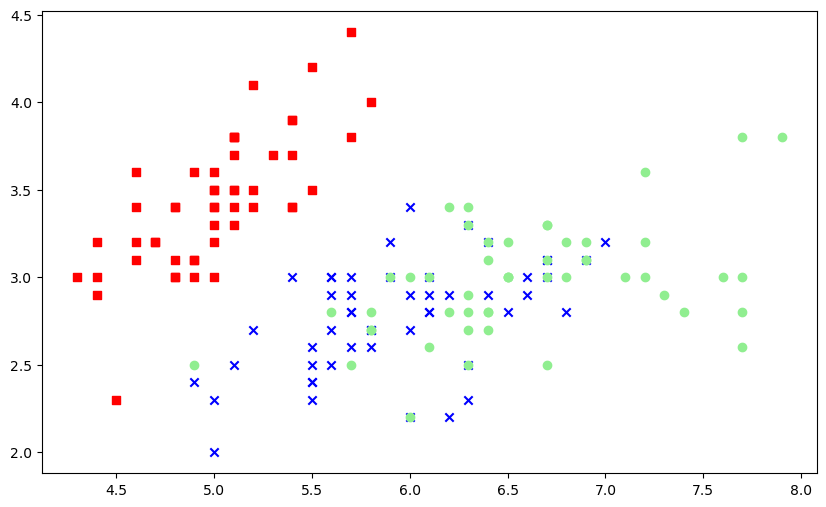

In [74]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)
    

### If we plot the original data, we can see that one of the classes is linearly separable, but the other two are not.

## Training the SVM model on the Training set

In [75]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)


SVC(gamma=0.1, random_state=0)

### Dispplay the support Vectors of model

In [76]:
print("Support Vector for model are :",svm.support_vectors_)

Support Vector for model are : [[-0.56098497  0.80188541]
 [-1.25269487 -0.11925475]
 [-1.59854983 -1.73125004]
 [-1.13740989 -0.11925475]
 [-1.13740989  0.11103029]
 [-1.0221249   0.34131533]
 [-0.90683992  0.57160037]
 [-0.56098497  0.80188541]
 [-0.09984503  2.18359565]
 [-1.0221249  -0.11925475]
 [-0.44569998  1.03217045]
 [-1.13740989  0.11103029]
 [ 0.01543995 -0.11925475]
 [-0.09984503 -1.04039491]
 [-1.0221249  -2.42210516]
 [-0.330415   -1.27067995]
 [ 0.47657989  0.57160037]
 [ 1.28357478  0.34131533]
 [ 0.13072494  0.80188541]
 [-0.330415   -0.81010987]
 [-0.330415   -0.34953979]
 [ 0.24600992 -0.11925475]
 [-0.21513002 -0.11925475]
 [ 1.1682898   0.11103029]
 [-0.90683992 -1.27067995]
 [ 0.36129491 -1.96153508]
 [-0.21513002 -0.34953979]
 [-0.21513002 -0.57982483]
 [ 0.82243484 -0.11925475]
 [ 0.59186487 -0.34953979]
 [-1.13740989 -1.50096499]
 [ 0.93771983  0.11103029]
 [-0.21513002 -0.57982483]
 [-0.09984503 -0.81010987]
 [-0.21513002 -1.04039491]
 [ 0.47657989 -1.2706799

In [77]:
print("Number of suppoort Vectors of each class 0 : - ",svm.n_support_[0])
print("Number of suppoort Vectors of each class 1 : - ",svm.n_support_[1])
print("Number of suppoort Vectors of each class 2 : - ",svm.n_support_[2])

Number of suppoort Vectors of each class 0 : -  12
Number of suppoort Vectors of each class 1 : -  30
Number of suppoort Vectors of each class 2 : -  28


In [78]:
print("Indices for support vectors are : ",svm.support_)

Indices for support vectors are :  [ 34  44  53  55  68  72  73  75  82  96 105 107   0   1   7  12  14  20
  22  25  26  28  33  36  39  41  43  70  71  74  77  79  89  90  91  94
  95 101 102 103 104 109   2   8   9  10  11  16  17  18  19  21  24  32
  38  47  48  51  52  54  56  65  81  88  92  93  98  99 108 110]


## Finding Accuracy of model on Test and Train Set

In [79]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.83 out of 1
The accuracy of the svm classifier on test data is 0.76 out of 1


## Finding Accuracy of model on using confiusion matrix

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, svm.predict(X_test_std))
print(confusion_matrix)

[[13  0  0]
 [ 0 12  4]
 [ 0  5  4]]


In [93]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
Accuracy= accuracy_score(y_test, svm.predict(X_test_std))
Precision = precision_score(y_test, svm.predict(X_test_std),average='macro')
Sensitivity_recall = recall_score(y_test, svm.predict(X_test_std),average='macro')
Specificity = recall_score(y_test, svm.predict(X_test_std), pos_label=0,average='macro')
F1_score = f1_score(y_test, svm.predict(X_test_std),average='macro')

C:\Users\gaurav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [94]:
#metrics
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score},end = "")

{'Accuracy': 0.7631578947368421, 'Precision': 0.7352941176470589, 'Sensitivity_recall': 0.7314814814814815, 'Specificity': 0.7314814814814815, 'F1_score': 0.7326203208556149}

## Create the function for Visualizing Testing and Training model

In [83]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
plt.show()


## Visualising the Train set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


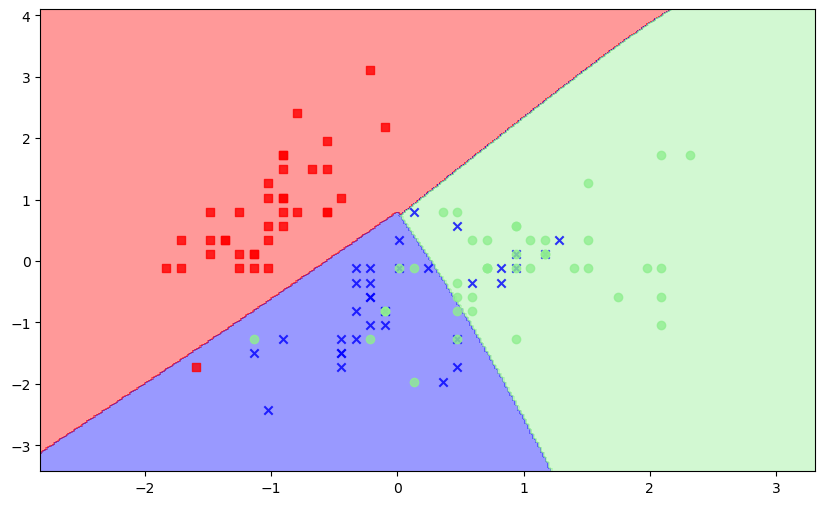

In [84]:
plot_decision_regions(X_train_std, y_train, svm)

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


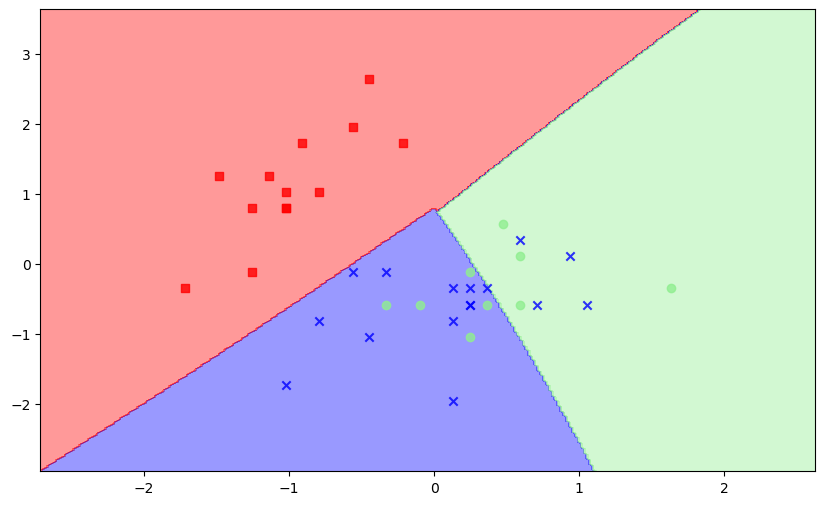

In [85]:
plot_decision_regions(X_test_std, y_test, svm)

### TASKS (For Testing Example Petal Width=1.2, Petal Length=2.0)

In [97]:
print("Number of suppoort Vectors of each class 0 : - ",svm.n_support_[0])
print("Number of suppoort Vectors of each class 1 : - ",svm.n_support_[1])
print("Number of suppoort Vectors of each class 2 : - ",svm.n_support_[2])

Number of suppoort Vectors of each class 0 : -  12
Number of suppoort Vectors of each class 1 : -  30
Number of suppoort Vectors of each class 2 : -  28


In [95]:
Accuracy_a = accuracy_score(y_train, svm.predict(X_train_std))
Accuracy_b= accuracy_score(y_test, svm.predict(X_test_std))
Precision = precision_score(y_test, svm.predict(X_test_std),average='macro')
F1_score = f1_score(y_test, svm.predict(X_test_std),average='macro')

In [96]:
#metrics
print({"Training Accuracy":Accuracy_a,
       "Testing Accuracy" : Accuracy_b,
       "Precision":Precision,
       "F1_score":F1_score},end = "")

{'Training Accuracy': 0.8303571428571429, 'Testing Accuracy': 0.7631578947368421, 'Precision': 0.7352941176470589, 'F1_score': 0.7326203208556149}

### Create model with following settings
***kernal='poly',degree=5,random_state=3,coef0=0.8,gamma=.01,C=1.0***

In [98]:
from sklearn.svm import SVC

svm = SVC(kernel='poly',degree=5, random_state=3,coef0=8,gamma=.01,C=1.0)
svm.fit(X_train_std, y_train)
print("Number of suppoort Vectors of each class 0 : - ",svm.n_support_[0])
print("Number of suppoort Vectors of each class 1 : - ",svm.n_support_[1])
print("Number of suppoort Vectors of each class 2 : - ",svm.n_support_[2])

Number of suppoort Vectors of each class 0 : -  2
Number of suppoort Vectors of each class 1 : -  23
Number of suppoort Vectors of each class 2 : -  24


In [99]:
Accuracy_a = accuracy_score(y_train, svm.predict(X_train_std))
Accuracy_b= accuracy_score(y_test, svm.predict(X_test_std))
Precision = precision_score(y_test, svm.predict(X_test_std),average='macro')
F1_score = f1_score(y_test, svm.predict(X_test_std),average='macro')
#metrics
print({"Training Accuracy":Accuracy_a,
       "Testing Accuracy" : Accuracy_b,
       "Precision":Precision,
       "F1_score":F1_score},end = "")

{'Training Accuracy': 0.8303571428571429, 'Testing Accuracy': 0.7631578947368421, 'Precision': 0.7444444444444445, 'F1_score': 0.7453310696095076}